In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [ ]:
mnist_train = torchvision.datasets.MNIST(root='.', train=True, download=True)
mnist_valid = torchvision.datasets.MNIST(root='.', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 111344524.04it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 93976488.61it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45945439.91it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15083554.05it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
x_train = mnist_train.data / 255
y_train = mnist_train.targets

x_valid = mnist_valid.data / 255
y_valid = mnist_valid.targets

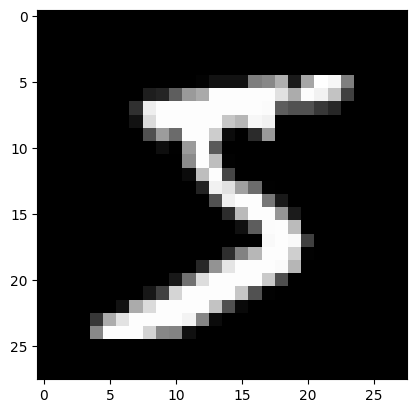

In [ ]:
plt.imshow(x_train[0], cmap='gray')

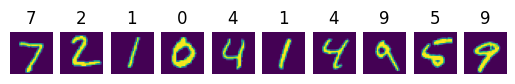

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_valid[i])
    plt.axis('off')
    plt.title(y_valid[i].item())

In [ ]:
y_train_5 = (y_train == 5).float().reshape(-1,1)
y_valid_5 = (y_valid == 5).float().reshape(-1,1)

In [ ]:
dataset_train = list(zip(x_train, y_train_5))
dataset_valid = list(zip(x_valid, y_valid_5))

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True, drop_last=True, num_workers=2)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=32, num_workers=2)

# list(loader_train)[0]
for x, y in loader_train:
    break

x.shape, y.shape
x.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
flatten = nn.Flatten()
lin1 = nn.Linear(784, 128)
relu1 = nn.ReLU()
lin2 = nn.Linear(128, 64)
relu2 = nn.ReLU()
lin3 = nn.Linear(64, 1)
sigmoid = nn.Sigmoid()

# z = flatten(x_train.float())
# z = lin1(z)
# z = relu1(z)
# z = lin2(z)
# z = relu2(z)
# z = lin3(z)
# z.shape

model = nn.Sequential(
    flatten, lin1, relu1, lin2, relu2, lin3, sigmoid
)

#안 좋은 모델..
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

model(x).shape

opt = torch.optim.Adam(model.parameters())

In [ ]:
import torchsummary
torchsummary.summary(model, (28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
            Linear-6                    [-1, 1]              65
           Sigmoid-7                    [-1, 1]               0
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


In [ ]:
loss_fn = nn.BCELoss()
prob = model(x)
loss_fn(prob, y)

tensor(0.7418, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = [[1, 2], [3, 4], [5, 6]]
c = [
    np.array([1, 2]),
    np.array([3, 4]),
    np.array([5, 6]),
]

for v in a:
    print(v.shape)

3

In [ ]:
def fool_model(x):
    #x.shape => n, 28, 28
    n = len(x)
    return torch.zeros(n, 1)

pred = fool_model(x_valid)
torch.mean((pred == y_valid_5).float())

tensor(0.9108)

In [ ]:
# 학습루틴
for epoch in range(5):
    #train......................
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_train:
        # 1. feed-forward
        prob = model(x)
        # 2. loss
        loss = loss_fn(prob, y)
        # 3. grad
        opt.zero_grad()
        loss.backward()
        # 4. update
        opt.step()
        step += 1

        pred = (prob.detach() > 0.5).float()
        acc = torch.mean((pred == y).float())
        acc_list.append(acc.item())

        loss_list.append(loss.item())
        print(f'\r epoch={epoch}  step={step}  loss={np.mean(loss_list)}   acc={np.mean(acc_list)}', end='')
    print()

    #valid........................
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_valid:
        # 1. feed-forward
        with torch.no_grad():
            prob = model(x)
        # 2. loss
        loss = loss_fn(prob, y)

        step += 1

        pred = (prob > 0.5).float()
        acc = torch.mean((pred == y).float())
        acc_list.append(acc.item())

        loss_list.append(loss.item())
        print(f'\r                        step={step}  loss={np.mean(loss_list)}   acc={np.mean(acc_list)}', end='')
    print()




 epoch=0  step=1876  loss=0.05017341786082834   acc=0.9842666666666666
                        step=314  loss=0.03191150904866679   acc=0.9886182108626198
 epoch=1  step=1876  loss=0.027518653016514145   acc=0.99105
                        step=314  loss=0.027644071916520928   acc=0.9899161341853036
 epoch=2  step=1876  loss=0.020487214341709234   acc=0.9931333333333333
                        step=314  loss=0.018154496121703084   acc=0.9932108626198083
 epoch=3  step=1876  loss=0.015832443709650156   acc=0.9948666666666667
                        step=314  loss=0.019758689037679085   acc=0.9922124600638977
 epoch=4  step=1876  loss=0.01297069592103168   acc=0.9958166666666667
                        step=314  loss=0.017913975357304955   acc=0.9942092651757188


In [ ]:
with torch.no_grad():
    prob = model(x_valid)
loss = loss_fn(prob, y_valid_5)
print('loss=', loss.item())

pred = (prob > 1.).float()
acc = torch.mean((pred == y_valid_5).float())
print('acc=', acc.item())

# total = 0
# for i in range(len(pred)):
#     if pred[i] == 0 and y_valid_5[i] == 0:
#         total += 1
TP = torch.sum((pred == 1) & (y_valid_5 == 1))
TN = torch.sum((pred == 0) & (y_valid_5 == 0))
FP = torch.sum((pred == 1) & (y_valid_5 == 0))
FN = torch.sum((pred == 0) & (y_valid_5 == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision=', precision.item())
print('recall=', recall.item())


loss= 0.017942488193511963
acc= 0.9107999801635742
precision= nan
recall= 0.0


In [ ]:
with torch.no_grad():
    prob = model(x_valid)

thresholds = torch.linspace(0, 1, 100)
precisions = []
recalls = []
for th in thresholds:
    pred = (prob > th).float()

    TP = torch.sum((pred == 1) & (y_valid_5 == 1))
    TN = torch.sum((pred == 0) & (y_valid_5 == 0))
    FP = torch.sum((pred == 1) & (y_valid_5 == 0))
    FN = torch.sum((pred == 0) & (y_valid_5 == 1))

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    precisions.append(precision)
    recalls.append(recall)

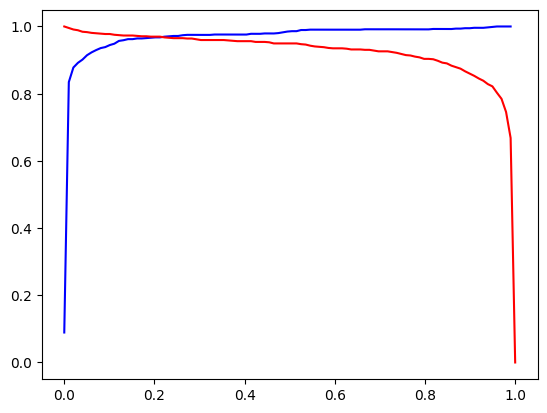

In [ ]:
plt.plot(thresholds, precisions, '-b')
plt.plot(thresholds, recalls, '-r')

(0.0, 1.0, 0.0, 1.0)

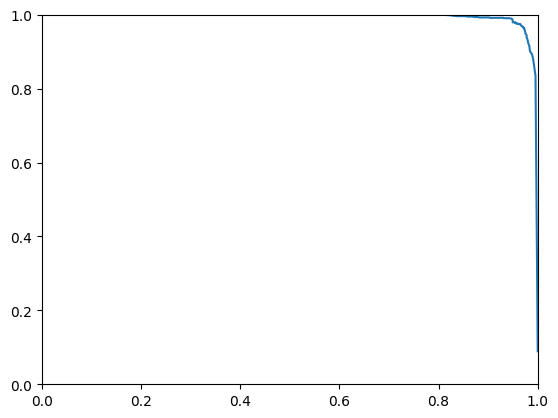

In [ ]:
plt.plot(recalls, precisions, '-')
plt.axis([0, 1, 0, 1])

# 다중 분류

In [ ]:
dataset_train = list(zip(x_train, y_train))
dataset_valid = list(zip(x_valid, y_valid))

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True, drop_last=True, num_workers=2)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=32, num_workers=2)

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
)

opt = torch.optim.Adam(model.parameters())

In [ ]:
loss_fn = nn.CrossEntropyLoss()
logit = model(x_valid)
loss =loss_fn(logit, y_valid)
loss

tensor(2.3022, grad_fn=<NllLossBackward0>)

In [ ]:
# 학습루틴
for epoch in range(10):
    #train......................
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_train:
        # 1. feed-forward
        logit = model(x)
        # 2. loss
        loss = loss_fn(logit, y)
        # 3. grad
        opt.zero_grad()
        loss.backward()
        # 4. update
        opt.step()
        step += 1

        prob = nn.functional.softmax(logit, dim=1)
        pred = prob.argmax(dim=1)
        acc = torch.mean((pred == y).float())
        acc_list.append(acc.item())

        loss_list.append(loss.item())
        print(f'\r epoch={epoch}  step={step}  loss={np.mean(loss_list):.4f}   acc={np.mean(acc_list):.2%}', end='')
    print()

    #valid........................
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_valid:
        # 1. feed-forward
        with torch.no_grad():
            logit = model(x)
        # 2. loss
        loss = loss_fn(logit, y)

        step += 1

        prob = nn.functional.softmax(logit, dim=1)
        pred = prob.argmax(dim=1)
        acc = torch.mean((pred == y).float())
        acc_list.append(acc.item())

        loss_list.append(loss.item())
        print(f'\r                        step={step}  loss={np.mean(loss_list) * 1000:.4f}   acc={np.mean(acc_list):.2%}', end='')
    print()

 epoch=0  step=1876  loss=0.0389   acc=98.75%
                        step=314  loss=0.0739   acc=97.93%
 epoch=1  step=1876  loss=0.0295   acc=99.03%
                        step=314  loss=0.0790   acc=97.77%
 epoch=2  step=1876  loss=0.0248   acc=99.19%
                        step=314  loss=0.1015   acc=97.22%
 epoch=3  step=1876  loss=0.0233   acc=99.24%
                        step=314  loss=0.0820   acc=97.93%
 epoch=4  step=1876  loss=0.0188   acc=99.34%
                        step=314  loss=0.0812   acc=98.04%
 epoch=5  step=1876  loss=0.0180   acc=99.38%
                        step=314  loss=0.0862   acc=97.88%
 epoch=6  step=1234  loss=0.0142   acc=99.49%

KeyboardInterrupt: ignored

In [ ]:
with torch.no_grad():
    logit = model(x_valid)
# prob = nn.functional.softmax(logit, dim=1)
pred = torch.argmax(logit, dim=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, pred)
cm

array([[ 971,    1,    0,    1,    3,    0,    2,    0,    2,    0],
       [   0, 1122,    2,    3,    0,    0,    2,    1,    5,    0],
       [   5,    0, 1002,    4,    6,    0,    0,    4,   11,    0],
       [   0,    0,    8,  976,    1,    4,    1,    6,    4,   10],
       [   0,    0,    1,    1,  972,    1,    1,    0,    1,    5],
       [   2,    0,    1,    4,    3,  859,   12,    1,    4,    6],
       [   3,    3,    0,    1,   12,    1,  935,    1,    2,    0],
       [   1,    2,   10,    0,    2,    0,    0, 1005,    4,    4],
       [   2,    0,    4,    1,    4,    1,    3,    3,  950,    6],
       [   1,    1,    0,    3,   16,    2,    0,    2,    1,  983]])

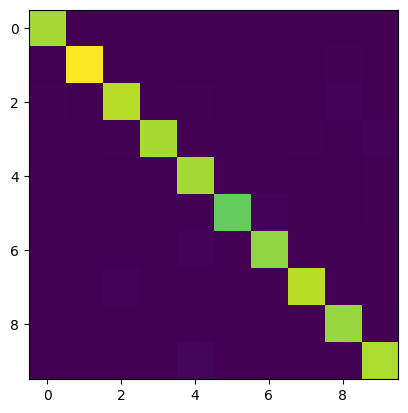

In [ ]:
plt.imshow(cm)

In [ ]:
np.fill_diagonal(cm, 0)
cm

array([[ 0,  1,  0,  1,  3,  0,  2,  0,  2,  0],
       [ 0,  0,  2,  3,  0,  0,  2,  1,  5,  0],
       [ 5,  0,  0,  4,  6,  0,  0,  4, 11,  0],
       [ 0,  0,  8,  0,  1,  4,  1,  6,  4, 10],
       [ 0,  0,  1,  1,  0,  1,  1,  0,  1,  5],
       [ 2,  0,  1,  4,  3,  0, 12,  1,  4,  6],
       [ 3,  3,  0,  1, 12,  1,  0,  1,  2,  0],
       [ 1,  2, 10,  0,  2,  0,  0,  0,  4,  4],
       [ 2,  0,  4,  1,  4,  1,  3,  3,  0,  6],
       [ 1,  1,  0,  3, 16,  2,  0,  2,  1,  0]])

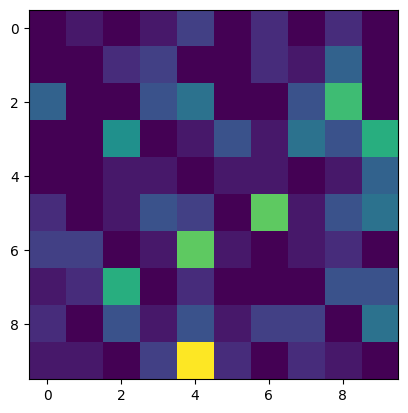

In [ ]:
plt.imshow(cm)

In [ ]:
y94 = (y_valid == 9) & (pred == 4)
sum(y94)
x94 = x_valid[y94]

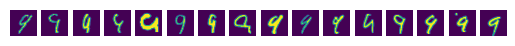

In [ ]:
for i in range(len(x94)):
    plt.subplot(1, len(x94), i+1)
    plt.imshow(x94[i])
    plt.axis('off')